<a href="https://colab.research.google.com/github/CindyMG/Core-II-W3/blob/main/Core_II_W3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Defining the question

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

In [27]:
#importing the python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Loading our dataset

[Hypothyroidism Dataset](http://bit.ly/hypothyroid_data)

In [28]:
thyroid = pd.read_csv('/content/hypothyroid.csv')

#preview the first five records
thyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [29]:
#let us check the shape of our dataset (number of rows and columns)
thyroid.shape

(3163, 26)

#Checking our dataset

In [30]:
#this gives us info on the dataset such as data types and presence of null values
thyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

#Cleaning our dataset

Removing null values.

In [31]:
#checking for any missing values in the dataset
thyroid =  pd.read_csv('hypothyroid.csv', na_values='?')

In [32]:
#here, we are going to replace the question marks/missing values with zeros; or otherwise, make them null values so it is easier to drop them later
thyroid = thyroid.replace(['?'], np.nan)

#checking for the sum of null values across the dataset
thyroid.isnull().sum().sum()

#around 5000! Not good, we need to drop them for smoother analysis

5329

In [33]:
#dropping the columns containing null values
thyroid.dropna(axis=1, inplace=True)

In [34]:
#previewing the dataset
thyroid

#Great! Now, no columns contain null values. 

,status,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured
0,hypothyroid,f,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y,n
1,hypothyroid,t,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y,n
2,hypothyroid,f,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y,n
3,hypothyroid,f,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y,n
4,hypothyroid,f,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,f,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y,n
3159,negative,f,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y,n
3160,negative,f,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y,n
3161,negative,f,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y,n


Removing duplicates.

In [35]:
#checking and dropping any duplicates in our dataset
thyroid.drop_duplicates(subset=None, keep='first', inplace=True)

#let us check how many records we have left after removing duplicates
thyroid.shape
# Our dataset had very many duplicates so there is a significant change in records. However, we can move on.

(141, 18)

Encoding the categorical columns

In [36]:
# all of our columns contain categorical data
# to make our work easier, we are going to encode the columns, or convert the categorical data into binary format(zeros and ones) for easier analysis
# previewing the list of the columns we have
#
thyroid.columns

Index(['status', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured',
       'FTI_measured', 'TBG_measured'],
      dtype='object')

In [37]:
#specifying our variable 'columns' 
#
columns = ['status','on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured',
       'FTI_measured', 'TBG_measured' ]

In [38]:
# using a for loop, we are going to iterate over our various columns and return the final data types after converting them from string to integer format
#
## Encoding the categorical columns

for i in columns:
  thyroid[i] = thyroid[i].astype('category')
  thyroid[i] = thyroid[i].cat.codes

# Confirming the changes

print(thyroid['status'].unique())
print(' ')
print(thyroid.dtypes)

[0 1]
 
status                       int8
on_thyroxine                 int8
query_on_thyroxine           int8
on_antithyroid_medication    int8
thyroid_surgery              int8
query_hypothyroid            int8
query_hyperthyroid           int8
pregnant                     int8
sick                         int8
tumor                        int8
lithium                      int8
goitre                       int8
TSH_measured                 int8
T3_measured                  int8
TT4_measured                 int8
T4U_measured                 int8
FTI_measured                 int8
TBG_measured                 int8
dtype: object


In [39]:
#previewing our dataset after encoding the categorical columns
thyroid

,status,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured
0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
5,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0
6,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0
8,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2653,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1
2798,1,0,0,1,0,0,1,1,0,0,0,0,1,1,1,1,1,0
2973,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
3026,1,0,0,0,0,0,0,1,0,1,0,0,1,1,1,1,1,0


In [40]:
thyroid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 3135
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   status                     141 non-null    int8 
 1   on_thyroxine               141 non-null    int8 
 2   query_on_thyroxine         141 non-null    int8 
 3   on_antithyroid_medication  141 non-null    int8 
 4   thyroid_surgery            141 non-null    int8 
 5   query_hypothyroid          141 non-null    int8 
 6   query_hyperthyroid         141 non-null    int8 
 7   pregnant                   141 non-null    int8 
 8   sick                       141 non-null    int8 
 9   tumor                      141 non-null    int8 
 10  lithium                    141 non-null    int8 
 11  goitre                     141 non-null    int8 
 12  TSH_measured               141 non-null    int8 
 13  T3_measured                141 non-null    int8 
 14  TT4_measured             

#Exploratory Data Analysis

##Univariate analysis

In [41]:
# we want to analyse the distribution of pregnancies(true or false) across our dataset
#using the groupby() function, we will group our pregnancies according to the status(hypothyroidism - 0 vs negative - 1)
status = thyroid.groupby(['status'])

# sort the values in descending order and preview them
preg = status['pregnant'].mean().sort_values( ascending = False).head(20)
preg

status
1    0.140496
0    0.050000
Name: pregnant, dtype: float64

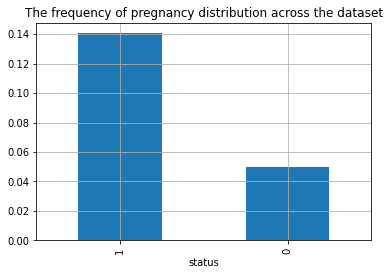

In [42]:
#plot a histogram to visualize the pregnancy distribution 
preg.plot(kind = 'bar')
plt.title('The frequency of pregnancy distribution across the dataset')
plt.grid()
plt.show()

#we can see there are more pregnancies among people with the 'negative' status

##Bivariate analysis

Checking multicollinearity between 'status' and the other fields




In [43]:
thyroid.corr()

,status,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured
status,1.000000,-0.001891,0.129565,0.042467,0.048760,0.005707,0.103881,0.094612,-0.000664,0.118262,0.048767,0.014437,-0.288451,-0.107618,-0.184134,-0.179492,-0.174808,0.151422
on_thyroxine,-0.001891,1.000000,-0.046761,-0.073818,0.001891,0.013878,-0.177000,-0.063281,-0.006076,-0.015994,-0.078129,-0.077695,0.053272,-0.023112,-0.035119,-0.048225,-0.019095,-0.013234
query_on_thyroxine,0.129565,-0.046761,1.000000,-0.092702,0.010963,-0.040864,-0.190086,-0.121913,-0.072839,0.090109,-0.038227,-0.074349,0.058273,0.111342,0.144338,0.140699,0.137026,-0.158638
on_antithyroid_medication,0.042467,-0.073818,-0.092702,1.000000,-0.042467,-0.148018,0.187145,-0.032035,-0.066485,-0.084615,-0.034893,-0.128424,0.019931,-0.036783,-0.008983,-0.014721,-0.020673,-0.012223
thyroid_surgery,0.048760,0.001891,0.010963,-0.042467,1.000000,-0.005707,0.034736,-0.094612,-0.092922,-0.118262,-0.048767,-0.124474,0.163819,0.026255,0.021866,0.014437,0.006754,-0.049510
query_hypothyroid,0.005707,0.013878,-0.040864,-0.148018,-0.005707,1.000000,-0.024326,-0.089498,-0.116302,-0.148018,0.087347,-0.082182,0.090285,0.069732,0.043709,0.034692,0.025377,-0.077362
query_hyperthyroid,0.103881,-0.177000,-0.190086,0.187145,0.034736,-0.024326,1.000000,-0.034946,-0.136327,-0.173504,-0.071547,0.042084,-0.075939,-0.069557,-0.030118,-0.042084,-0.054506,0.107185
pregnant,0.094612,-0.063281,-0.121913,-0.032035,-0.094612,-0.089498,-0.034946,1.000000,-0.087434,-0.032035,-0.045887,0.003672,0.093336,0.114022,0.003610,-0.003672,-0.011215,-0.030604
sick,-0.000664,-0.006076,-0.072839,-0.066485,-0.092922,-0.116302,-0.136327,-0.087434,1.000000,-0.066485,-0.027416,-0.100907,-0.081400,0.024562,-0.070243,-0.075837,-0.081682,0.049920
tumor,0.118262,-0.015994,0.090109,-0.084615,-0.118262,-0.148018,-0.173504,-0.032035,-0.066485,1.000000,-0.034893,-0.128424,-0.088157,0.016139,-0.008983,-0.014721,0.052200,-0.078511


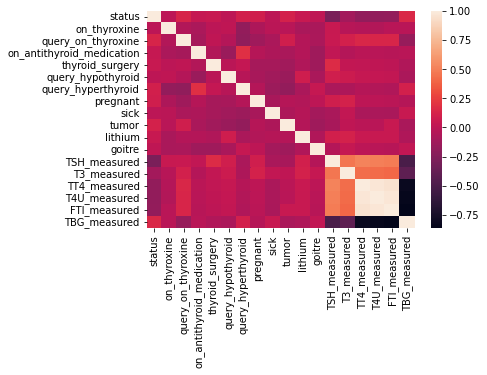

In [44]:
#use a heatmap to check multicollinearity of fields 
sns.heatmap(thyroid.corr())

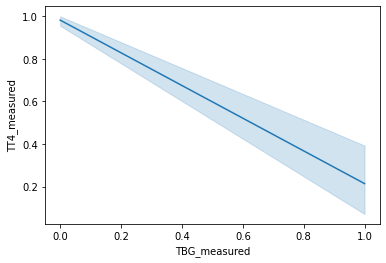

In [45]:
#using a line graph, we will check for a relationship between 'TBG_measured' and 'TT4_measured'
sns.lineplot(x='TBG_measured', y='TT4_measured', data=thyroid, palette='hls')

# the line has a steep negative gradient. This indicates that these two variables have a strong negative correlation.

#Decision Trees

In [64]:
#importing the libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [68]:
thyroid.columns

Index(['status', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured',
       'FTI_measured', 'TBG_measured'],
      dtype='object')

In [69]:
features = ['on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured',
       'FTI_measured', 'TBG_measured']

In [70]:
# assigning our variables
features = ['on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured',
       'FTI_measured', 'TBG_measured']
y = thyroid['status']

In [66]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state =99)
# Fitting the model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
# Making predictions
y_pred = tree.predict(X_test)
# Checking the accuracy
print('Prediction accuracy:', accuracy_score(y_train, tree.predict(X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))
# The prediction accuracy in this case is 91.4%, a suitable score since it is high but not too high with the risk of overfitting

Prediction accuracy: 0.9142857142857143
Test accuracy: 0.6111111111111112


Tree visualization

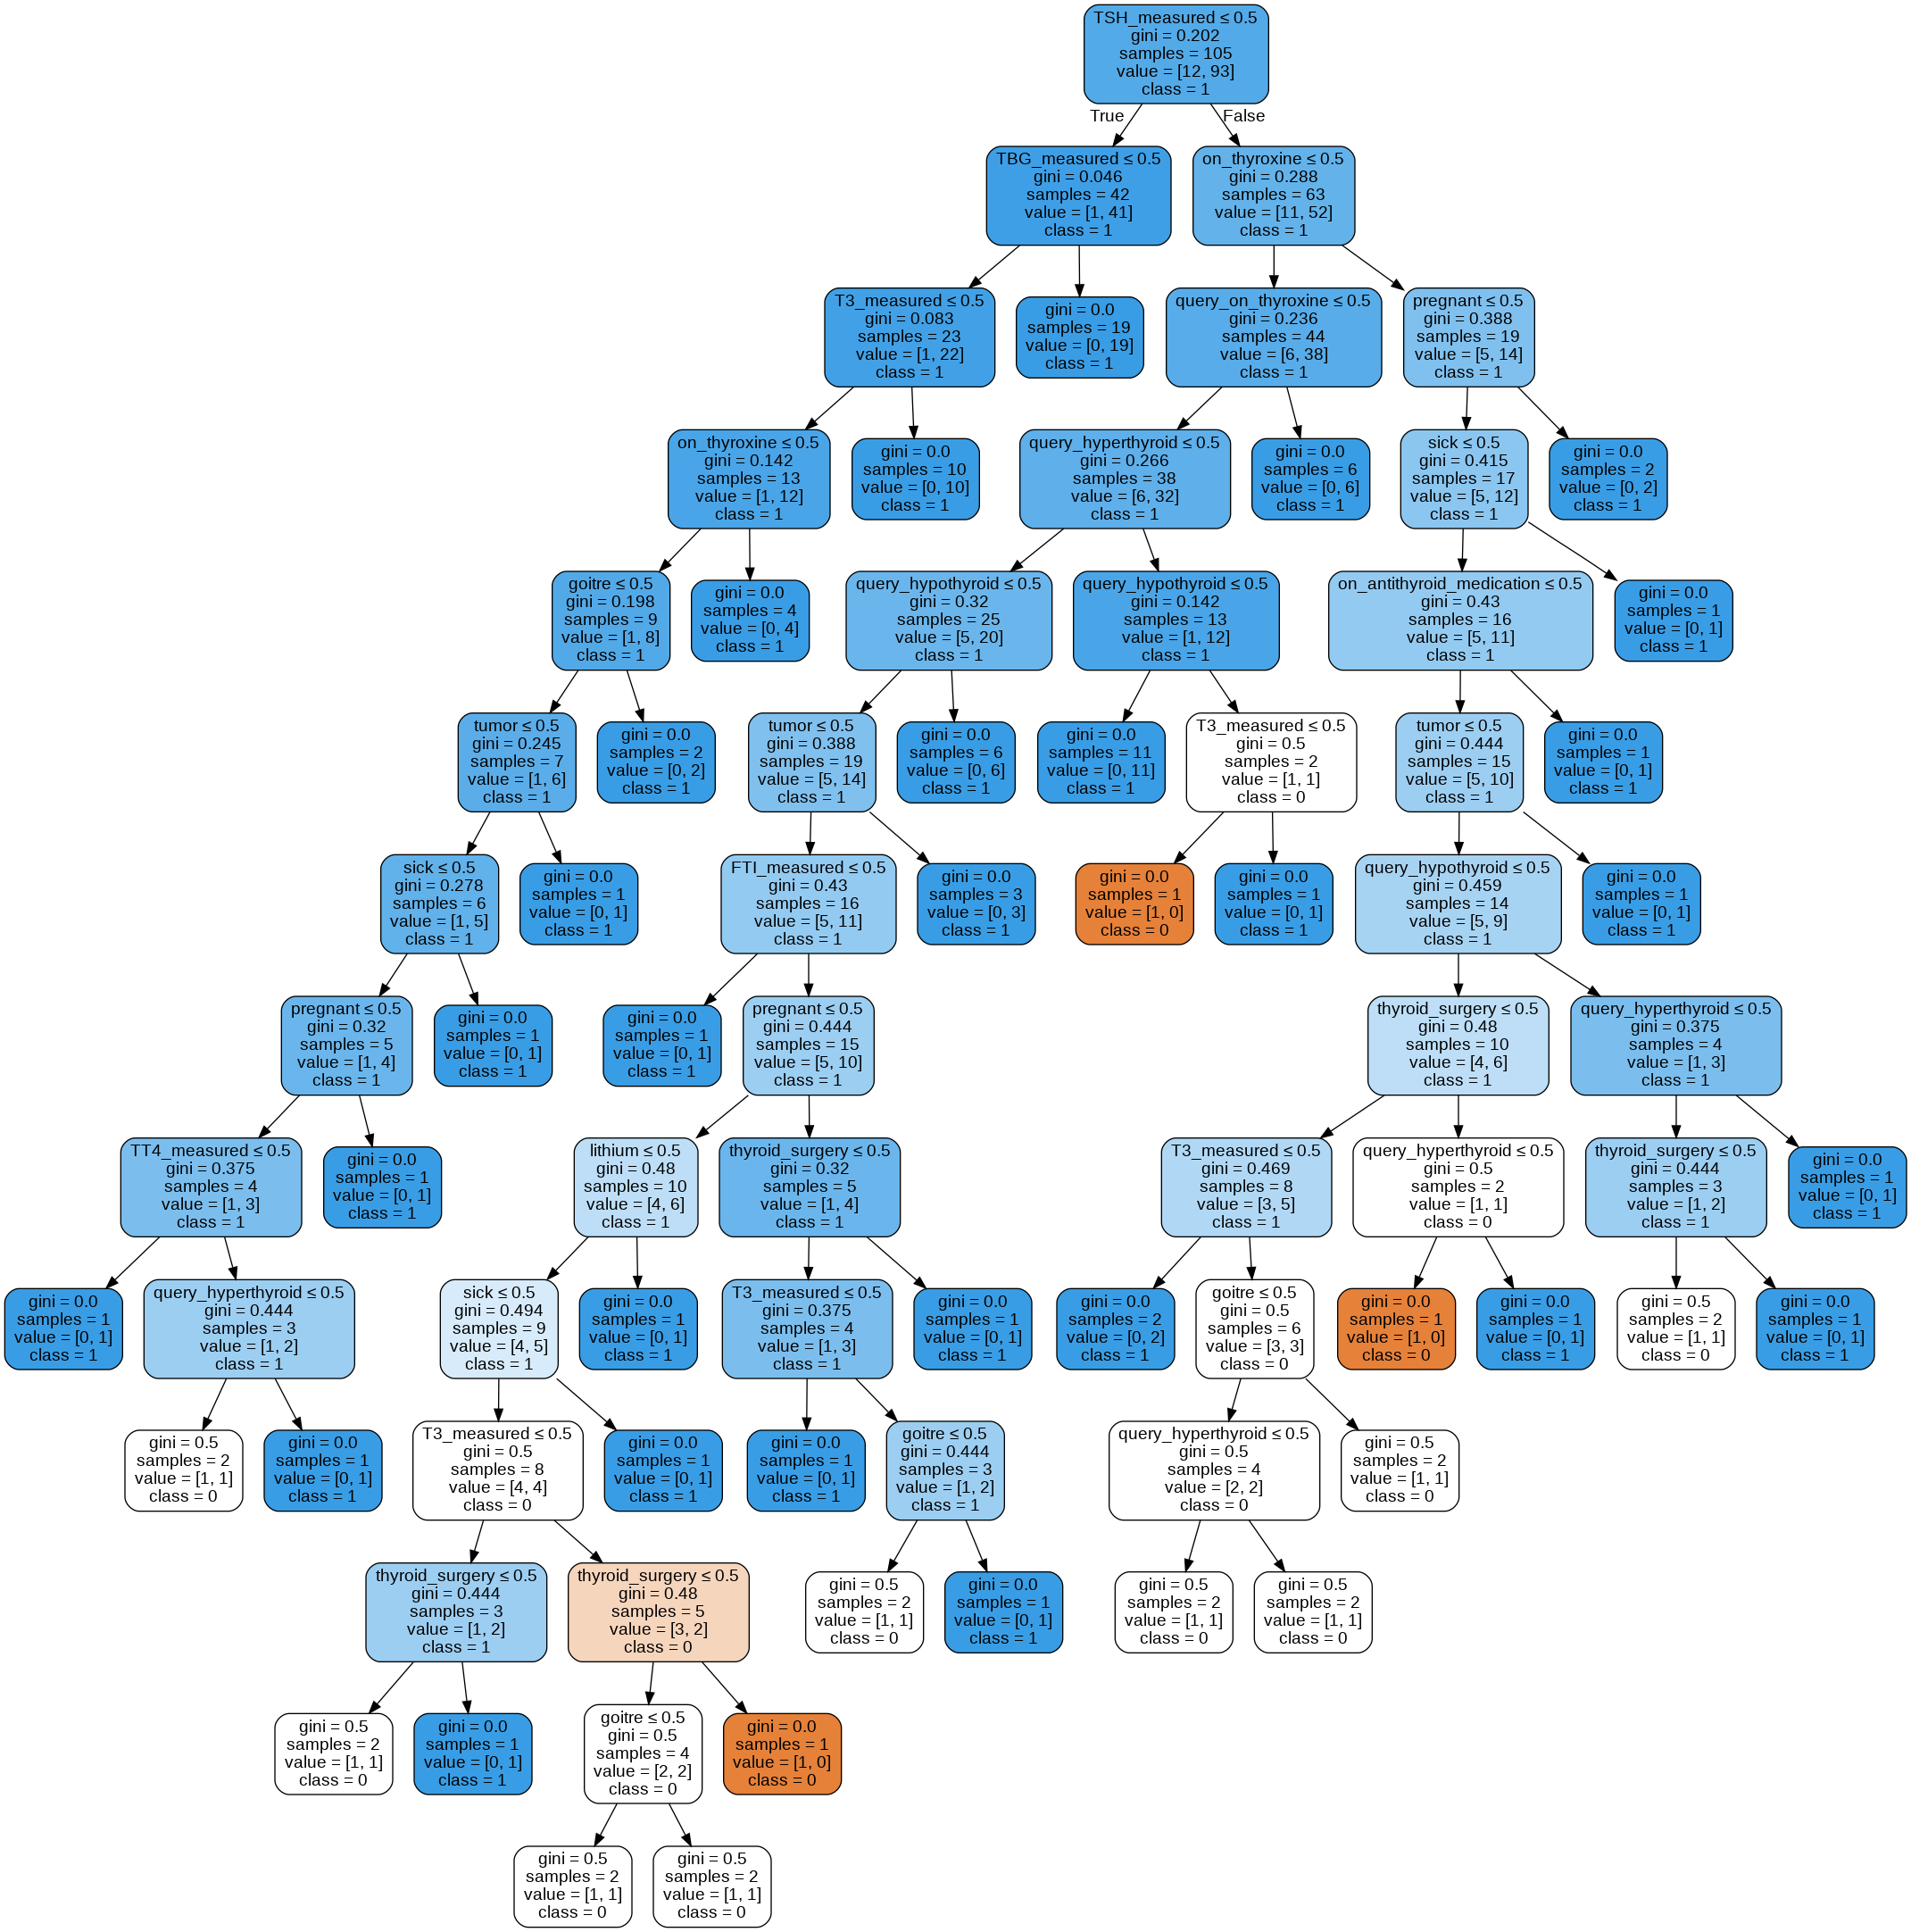

In [73]:
#importing the necessary libraries
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# based on our tree visualization, the variable 'TSH_measured' appears to be the most important feature/variable 
# followed closely by 'TBG_measured' and 'on_thyroxine'

#AdaBoosting

In [49]:
from sklearn.ensemble import AdaBoostClassifier

In [50]:
# Checking if Adaboost does any better
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=3), 
                          n_estimators=300, random_state=20)
ada_boost.fit(X_train, y_train)
y_pred = ada_boost.predict(X_test)

# Obtaining the accuracy score
print('Prediction accuracy:', accuracy_score(y_train, ada_boost.predict(X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# Adaboost test accuracy is 66.6%, an improvement compared to that of Decision trees(61.1%)

Prediction accuracy: 0.9142857142857143
Test accuracy: 0.6666666666666666


#Gradient Boosting

In [51]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

#fitting model
gbr = GradientBoostingClassifier()
gbr = gbr.fit(X_train, y_train)

#making predictions
y_pred = gbr.predict(X_test)

# Obtaining the accuracy score
print('Prediction accuracy:', accuracy_score(y_train, gbr.predict(X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# by using GradientBoost, the test accuracy is 69.4%, an improvement from the two previous models
# Test accuracy scores:
#Decision trees - 61.1%
# Adaboost - 66.6%
# GradientBoost - 69.4%
# from the above scores, we can deduce that GradientBoosting is the best model fit for our data

Prediction accuracy: 0.9047619047619048
Test accuracy: 0.6944444444444444


In [54]:
x = ['on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured',
       'FTI_measured', 'TBG_measured']

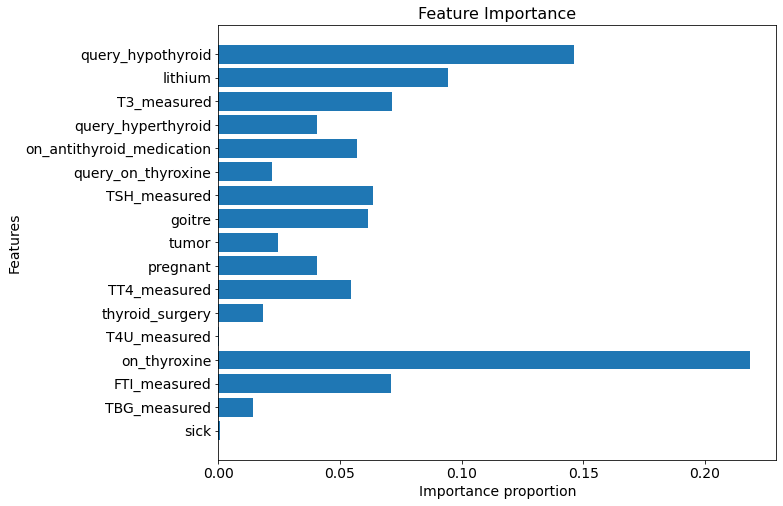

In [55]:
# Get Feature importance data using feature_importances_ attribute
#
feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(10, 8))
plt.barh(sorted_idx, feature_importance, align='center')
#plt.yticks(pos, np.array(X)[sorted_idx])
plt.title('Feature Importance', fontsize=16)
result = permutation_importance(gbr, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.xlabel('Importance proportion', fontsize = 14)
plt.ylabel('Features', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(sorted_idx, x, fontsize = 14)
plt.show()

#we can see that the most important feature using this model is 'on_thyroxine'... different from the predictions made by Decision trees
# with decision trees, 'TSH_measured' was the most accurate feature


#Support Vector Machines (SVM)

##Linear model

In [164]:
# Standardizing our X_train and X_test. 
# Bringing the values within the same range increases accuracy of the model predictions.

#importing the libraries
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#assigning variables
std_X_train = sc.fit_transform(X_train)
std_X_test = sc.fit_transform(X_test)

#importing the libraries
from sklearn.svm import SVC

# Building the linear model
linear = SVC(kernel= 'linear')

# Fitting the model
linear.fit(std_X_train, y_train)

# Making predictions
y_pred = linear.predict(std_X_test)

# Model Accuracy
print('Prediction accuracy:', accuracy_score(y_train, linear.predict(std_X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# Without any hyperparameter tuning, the prediction accuracy is 88.3%

Prediction accuracy: 0.8839285714285714
Test accuracy: 0.7586206896551724


In [165]:
# Hyperparameter tuning using grid search
#importing GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'C': np.arange(1,10,1), 
              'gamma': np.arange(1,10, 1),
              'kernel' : ['linear']}

search = GridSearchCV(estimator = linear, param_grid = param_grid, cv = 5, scoring = 'accuracy')

In [166]:
# Getting the best parameters
search.fit(std_X_train, y_train)
print(search.best_params_)
print(search.best_score_)

#now that we have our most suitable parameters as outlined below, our optimal prediction accuracy score should be 88.4%

{'C': 1, 'gamma': 1, 'kernel': 'linear'}
0.884189723320158


In [184]:
# Building the linear model with the recommended parameters
linear = SVC(kernel= 'linear', C=1 , gamma=1, degree=1)

# Fitting the model
linear.fit(std_X_train, y_train)

# Making predictions
y_pred = linear.predict(std_X_test)

# Model Accuracy
print('Prediction accuracy:', accuracy_score(y_train, linear.predict(std_X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# even now after hyperparameter tuning, our prediction accuracy remains 88.3% 
# although the prediction accuracy remained the same, it is not so different from the optimal score(88.4%)

Prediction accuracy: 0.8839285714285714
Test accuracy: 0.7586206896551724


Feature selection and linear models

In [183]:
# Using only two features with the linear kernel to see if they will give a higher accuracy
X1 = thyroid[['on_thyroxine', 'TSH_measured']]

# Splitting again
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2, random_state = 66)

# Standardization
std2_X_train = sc.fit_transform(X_train)
std2_X_test = sc.transform(X_test)

# Fitting the model
linear.fit(std2_X_train, y_train)

# Making predictions
y_pred = linear.predict(std2_X_test)

# Model Accuracy
print('Prediction accuracy:', accuracy_score(y_train, linear.predict(std2_X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

#even after feature selection, our model's prediction accuracy remained 88.3%

Prediction accuracy: 0.8839285714285714
Test accuracy: 0.7586206896551724


##Polynomial model

In [167]:
# Building the polynomial model
polynomial = SVC(kernel= 'poly')

# Fitting the model
polynomial.fit(std_X_train, y_train)

# Making predictions
y_pred = polynomial.predict(std_X_test)

# Model Accuracy
print('Prediction accuracy:', accuracy_score(y_train, polynomial.predict(std_X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# Without hyperparameter tuning, the polynomial model gives a prediction accuracy of 88.3%

Prediction accuracy: 0.8839285714285714
Test accuracy: 0.7586206896551724


In [168]:
# Hyper parameter tuning
param_grid = {'degree': np.arange(1,5,1), 
              'gamma': [1,0.1,0.01,0.001],
              'C': np.arange(1,10,1),
              'kernel' : ['poly']}

search = GridSearchCV(estimator = polynomial, param_grid = param_grid, scoring = 'accuracy')

# Getting the best parameters
search.fit(std_X_train, y_train)
print(search.best_params_)
print(search.best_score_)

#our recommended parameters are shown below where the optimal accuracy is 88.4%
#with these, we can tune our model to improve the prediction accuracy

{'C': 1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}
0.884189723320158


In [169]:
# Building the polynomial model with the recommended parameters
polynomial = SVC(kernel= 'poly', C=1 , gamma=1, degree=1)

# Fitting the model
polynomial.fit(std_X_train, y_train)

# Making predictions
y_pred = polynomial.predict(std_X_test)

# Model Accuracy
print('Prediction accuracy:', accuracy_score(y_train, polynomial.predict(std_X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# even now after hyperparameter tuning, our prediction accuracy remains 88.3% 
# although the prediction accuracy remained the same, it is not so different from the optimal score(88.4%)

Prediction accuracy: 0.8839285714285714
Test accuracy: 0.7586206896551724


## rbf model

In [170]:
# Building the rbf model
rbf = SVC(kernel= 'rbf')

# Fitting the model
rbf.fit(std_X_train, y_train)

# Making predictions
y_pred = rbf.predict(std_X_test)

# Model Accuracy
print('Prediction accuracy:', accuracy_score(y_train, rbf.predict(std_X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# With the rbf kernel, the accuracy came at 88.3%

Prediction accuracy: 0.8839285714285714
Test accuracy: 0.7586206896551724


In [185]:
# Hyper parameter tuning
param_grid = {'degree': np.arange(1,5,1), 
              'gamma': [1,0.1,0.01,0.001],
              'C': np.arange(1,10,1),
              'kernel' : ['rbf']}

search = GridSearchCV(estimator = rbf, param_grid = param_grid, scoring = 'accuracy')

# Getting the best parameters
search.fit(std_X_train, y_train)
print(search.best_params_)
print(search.best_score_)

#our recommended parameters are shown below where the optimal accuracy is 88.4%
#with these, we can tune our model to improve the prediction accuracy

{'C': 1, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}
0.884189723320158


In [186]:
# Building the rbf model with the recommended parameters
rbf = SVC(kernel= 'rbf', C=1 , gamma=1, degree=1)

# Fitting the model
rbf.fit(std_X_train, y_train)

# Making predictions
y_pred = rbf.predict(std_X_test)

# Model Accuracy
print('Prediction accuracy:', accuracy_score(y_train, rbf.predict(std_X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

# even now after hyperparameter tuning, our prediction accuracy remains 88.3% 
# although the prediction accuracy remained the same, it is not so different from the optimal score(88.4%)

# with SVM, after performing hyperparameter tuning and feature selection on all three models(linear, polynomial and rbf)
# the prediction accuracy scores remained the same(88.3%)
# this indicates that any of the three models can be used to make an appropriate model

Prediction accuracy: 0.8839285714285714
Test accuracy: 0.7586206896551724
